In [1]:
import pandas as pd

df = pd.read_csv("country_wise_latest.csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

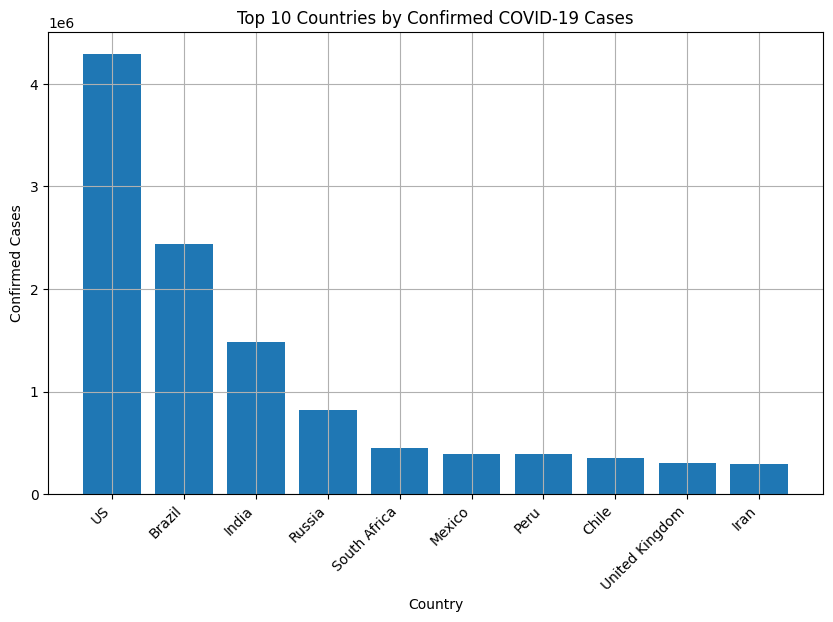

In [2]:
#Bar chart – Top 10 countries by confirmed cases
import matplotlib.pyplot as plt

top10 = df.sort_values("Confirmed", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10["Country/Region"], top10["Confirmed"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.grid(True)
plt.show()


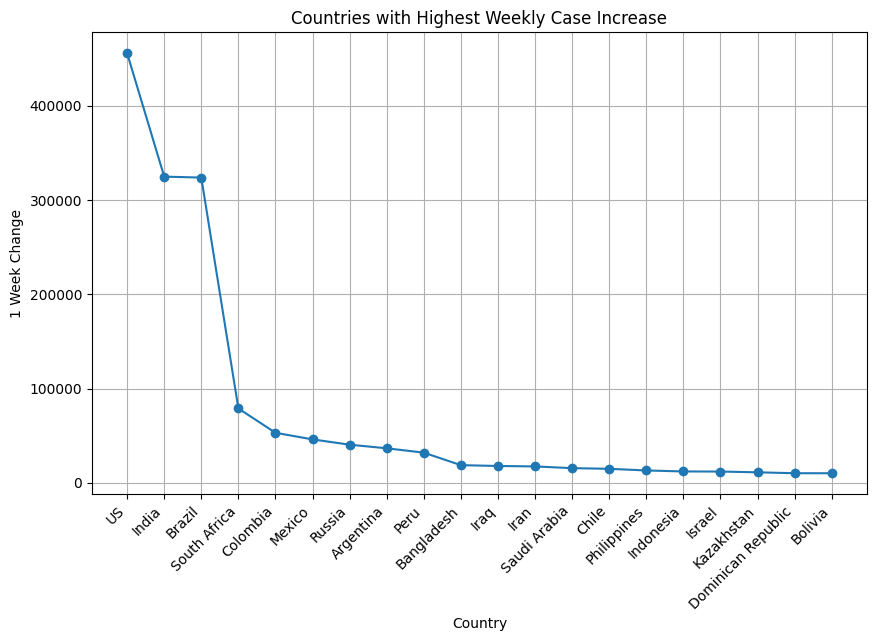

In [3]:
#Line chart – Weekly increase trend
trend = df.sort_values("1 week change", ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.plot(trend["Country/Region"], trend["1 week change"], marker='o')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("1 Week Change")
plt.title("Countries with Highest Weekly Case Increase")
plt.grid(True)
plt.show()


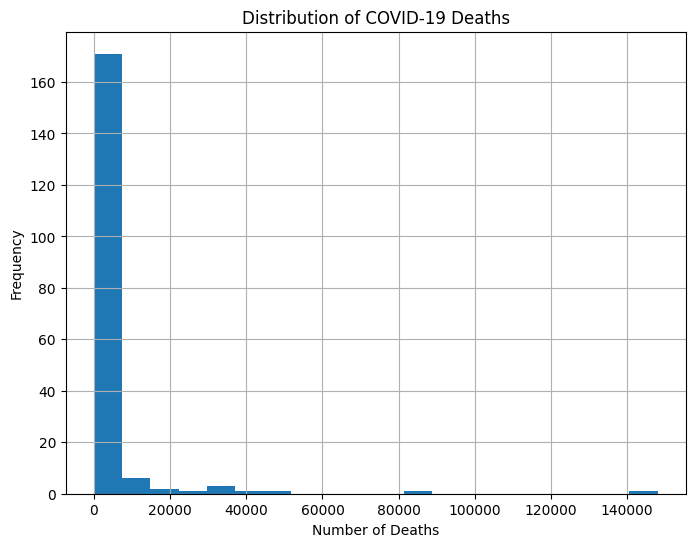

In [4]:
#Histogram – Distribution of deaths
plt.figure(figsize=(8,6))
plt.hist(df["Deaths"], bins=20)
plt.xlabel("Number of Deaths")
plt.ylabel("Frequency")
plt.title("Distribution of COVID-19 Deaths")
plt.grid(True)
plt.show()


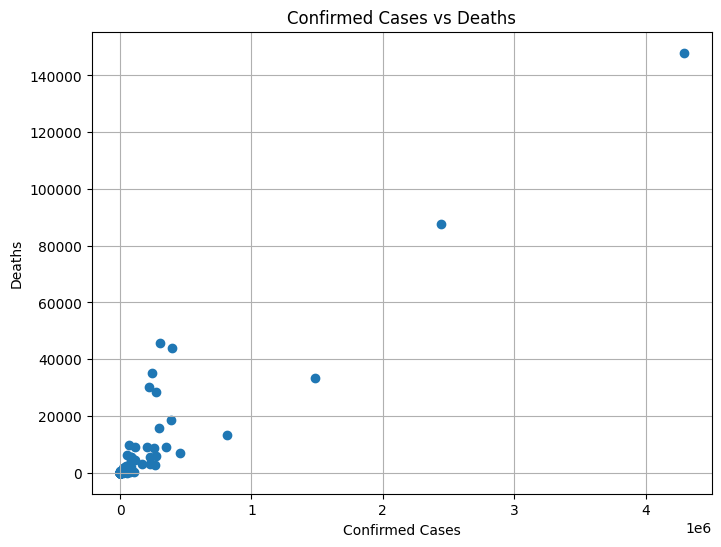

In [5]:
#Scatter plot – Confirmed cases vs deaths
plt.figure(figsize=(8,6))
plt.scatter(df["Confirmed"], df["Deaths"])
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.title("Confirmed Cases vs Deaths")
plt.grid(True)
plt.show()


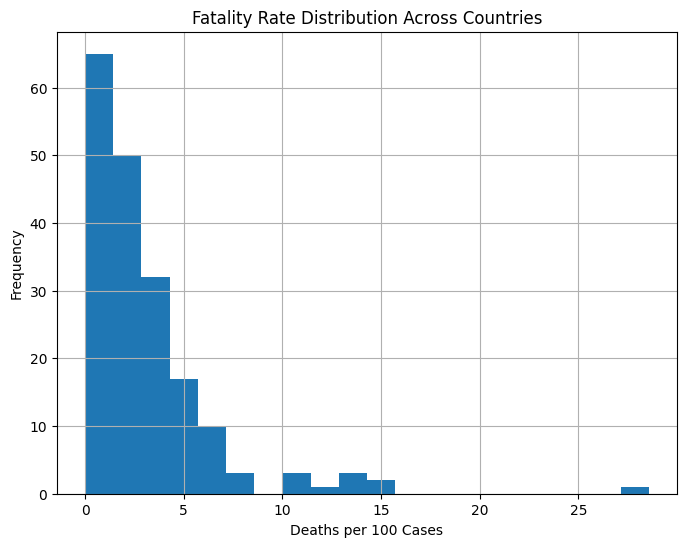

In [6]:
#Percentage-based analysis
plt.figure(figsize=(8,6))
plt.hist(df["Deaths / 100 Cases"], bins=20)
plt.xlabel("Deaths per 100 Cases")
plt.ylabel("Frequency")
plt.title("Fatality Rate Distribution Across Countries")
plt.grid(True)
plt.show()


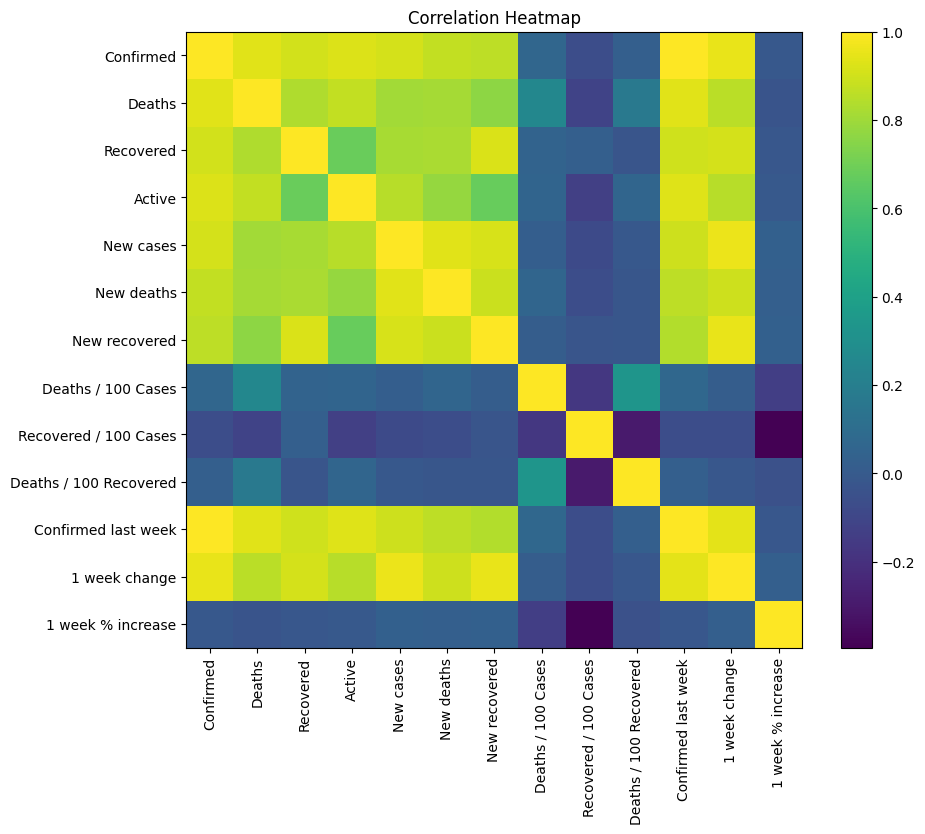

In [7]:
#Correlation heatmap(numeric only)
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Rank Countrues
df["Confirmed_Rank"] = df["Confirmed"].rank(ascending=False)
df[["Country/Region", "Confirmed", "Confirmed_Rank"]].head()


,Country/Region,Confirmed,Confirmed_Rank
0,Afghanistan,36263,51.0
1,Albania,4880,96.0
2,Algeria,27973,57.0
3,Andorra,907,145.0
4,Angola,950,143.0


In [9]:
#Saved processed data
df.to_csv("processed_covid_data.csv", index=False)
